# Exploring the difference in user preference between a new web page and the current one.

In [45]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing and exploring data

In [46]:
# Load data

data_df = pd.read_csv('ab_data.csv')
data_df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [47]:
# Remove extra space from column name

data_df = data_df.rename(columns= {'user_id 	':'user_id'})

In [48]:
# Check types

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [49]:
# Check for null values

data_df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [50]:
# Get shape of .csv file

data_df.shape

(294478, 5)

In [51]:
# Check for duplicated values

data_df.duplicated().sum()

0

In [52]:
# Check unique objects

data_df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [63]:
# Remove duplicated users

data_df = data_df.drop_duplicates(subset= 'user_id', keep= 'first')
data_df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [64]:
# How many in each group

data_df['group'].value_counts()

treatment    145352
control      145232
Name: group, dtype: int64

In [65]:
# Check how many in each 'group'

data_df['group'].value_counts()

treatment    145352
control      145232
Name: group, dtype: int64

In [66]:
# Find amount that converted to new page

converted = data_df.groupby(by= ['group']).mean()
converted

,user_id,converted
group,,
control,788143.414241,0.120297
treatment,787866.452577,0.118843


In [67]:
# Check range of dates that the two optinons were shown

data_df['timestamp'].min(), data_df['timestamp'].max()

('2017-01-02 13:42:05.378582', '2017-01-24 13:41:54.460509')

In [68]:
# Look at control group old page vs new page

control = data_df[data_df['group'] == 'control'].value_counts('landing_page')
control

landing_page
old_page    144226
new_page      1006
dtype: int64

In [69]:
# Look at control group old vs new page

control = data_df[data_df['group'] == 'treatment'].value_counts('landing_page')
control

landing_page
new_page    144314
old_page      1038
dtype: int64

# Visuals

Text(0.5, 1.0, 'Amount converted to new site')

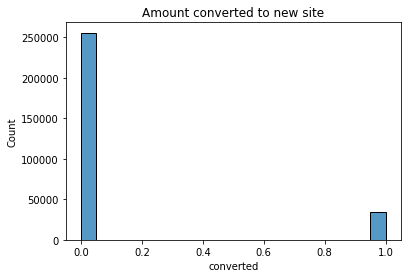

In [70]:
# Amount who prefered old to new site
%matplotlib inline

sns.histplot(data = data_df.converted)
plt.title(label= 'Amount converted to new site')